In [1]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import ta
import os
import phik

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV,
                                     GridSearchCV)


from sklearn.preprocessing import (StandardScaler,
                                   RobustScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder)


from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import (make_scorer,
                             mean_absolute_error,
                             roc_auc_score,
                             f1_score,
                             precision_score,
                             accuracy_score,
                             recall_score, 
                             classification_report, 
                             confusion_matrix,
                             precision_recall_curve, 
                             average_precision_score,
                             mean_squared_error)


from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import scipy.stats as stats

from itertools import combinations

from sklearn.dummy import DummyClassifier

import os
import phik
import yfinance as yf

TEST_SIZE = 0.25
RANDOM_STATE = 666


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format','{:.4f}'.format)

In [69]:
df_train = pd.read_csv('heart_train.csv')
df_test = pd.read_csv('heart_test.csv')

In [70]:
df_train.shape

(8685, 28)

In [71]:
df_train.head()

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.3596,0.7321,0.0742,1.0000,1.0000,1.0000,1.0000,1.0000,0.5355,1,1.0000,0.0000,8.0000,0.2257,0.1059,0.4592,0.9792,3.0000,0.3333,0.0000,0.2270,0.0482,0.0365,Male,0.2129,0.7093,2664
1,1,0.2022,0.3250,0.0477,1.0000,1.0000,0.0000,0.0000,1.0000,0.0687,2,1.0000,0.0000,9.0000,0.2899,0.1642,0.1171,0.5156,3.0000,0.8333,0.0000,0.1502,0.0176,0.0002,Female,0.4129,0.5698,9287
2,2,0.6067,0.8607,0.0559,1.0000,0.0000,1.0000,1.0000,1.0000,0.9440,2,1.0000,1.0000,6.0000,0.5501,0.5987,0.3736,0.0130,2.0000,1.0000,0.0000,0.2270,0.0482,0.0365,Female,0.2387,0.2209,5379
3,3,0.7303,0.0071,0.0532,0.0000,0.0000,1.0000,0.0000,1.0000,0.6970,0,0.0000,1.0000,3.0000,0.3310,0.0776,0.0497,0.1312,0.0000,0.3333,1.0000,0.2270,0.0482,0.0365,Female,0.3484,0.2674,8222
4,4,0.7753,0.7571,0.0220,0.0000,0.0000,1.0000,0.0000,1.0000,0.4129,1,0.0000,0.0000,8.0000,0.5246,0.3420,0.8304,0.0701,5.0000,1.0000,1.0000,0.2270,0.0482,0.0365,Male,0.6194,0.4419,4047


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

In [9]:
df_test.shape

(966, 27)

In [10]:
df_test.head()

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.4944,0.2643,0.0623,0.0000,1.0000,1.0000,1.0000,1.0000,0.3616,2,0.0000,0.0000,8.0000,0.1944,0.5878,0.2835,0.3065,1.0000,0.3333,0.2270,0.0482,0.0365,Male,0.2839,0.3721,7746
1,1,0.2247,0.9536,0.0825,1.0000,0.0000,0.0000,1.0000,0.0000,0.9965,2,1.0000,1.0000,5.0000,0.3299,0.6029,0.4670,0.0870,0.0000,0.1667,0.2270,0.0482,0.0365,Female,0.7032,0.4419,4202
2,2,0.6292,0.0929,0.0642,0.0000,1.0000,1.0000,1.0000,0.0000,0.9956,0,0.0000,0.0000,10.0000,0.7801,0.3704,0.4094,0.2052,7.0000,1.0000,0.1028,0.0027,0.0885,Male,0.4581,0.7791,6632
3,3,0.4607,0.5679,0.0559,1.0000,1.0000,1.0000,1.0000,1.0000,0.4373,0,0.0000,0.0000,10.0000,0.7851,0.3682,0.9103,0.1636,0.0000,0.6667,0.2036,0.0564,0.2718,Female,0.7419,0.2558,4639
4,4,0.7191,0.4857,0.0229,1.0000,0.0000,1.0000,0.0000,1.0000,0.5149,0,0.0000,0.0000,7.0000,0.0709,0.7296,0.7589,0.5805,5.0000,0.0000,0.2270,0.0482,0.0365,Male,0.4129,0.3953,4825


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null    float64
 12  Medication Use        

In [12]:
df_train.isna().sum()

Unnamed: 0                           0
Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                           243
Family History                     243
Smoking                            243
Obesity                            243
Alcohol Consumption                243
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems            243
Medication Use                     243
Stress Level                       243
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week    243
Sleep Hours Per Day                  0
Heart Attack Risk (Binary)           0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Gender                               0
Systolic blood pressure  

In [13]:
missing_rows_train = df_train[df_train.isnull().any(axis=1)]
missing_rows_train


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
16,16,0.4494,0.4998,0.0632,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.2332,0.0267,0.0008,1.0,0.3935,0.2558,9528
90,90,0.3708,0.4998,0.0669,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.1542,0.0047,0.0420,1.0,0.2581,0.3372,9640
92,92,0.6292,0.4998,0.0733,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.2569,0.0123,0.0008,0.0,0.2581,0.2326,9515
185,185,0.5169,0.4998,0.0458,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.5593,0.0067,0.0003,0.0,0.1742,0.1512,9491
188,188,0.2697,0.4998,0.0357,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.1126,0.0512,0.0005,0.0,0.2258,0.1628,9448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,8461,0.7191,0.4998,0.0495,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.1383,0.0040,0.0032,1.0,0.5484,0.5581,9455
8509,8509,0.6517,0.4998,0.0367,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.2391,0.0558,0.0608,1.0,0.7290,0.7791,9506
8536,8536,0.6517,0.4998,0.0541,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.2767,0.0087,0.1504,1.0,0.6065,0.7907,9474
8619,8619,0.6067,0.4998,0.0596,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.1561,0.0577,0.0006,0.0,0.3871,0.5000,9467


In [14]:
len(missing_rows_train['id'].unique())

243

Для 243 пациентов из тренировочной выборки не указана часть данных

In [15]:
print(f'Пропущенные значения составляют {round(len(missing_rows_train) / len(df_train) * 100, 2)}% от всего датасета')

Пропущенные значения составляют 2.8% от всего датасета


In [16]:
missing_rows_test = df_test[df_test.isnull().any(axis=1)]

In [17]:
len(missing_rows_test['id'].unique())

31

In [18]:
print(f'Пропущенные значения составляют {round(len(missing_rows_test) / len(df_test) * 100, 2)}% от всего датасета')

Пропущенные значения составляют 3.21% от всего датасета


In [19]:
missing_columns_test = df_test.columns[df_test.isnull().any()]
missing_columns_train = df_train.columns[df_train.isnull().any()]

In [20]:
missing_columns_test

Index(['Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use',
       'Stress Level', 'Physical Activity Days Per Week'],
      dtype='object')

In [21]:
missing_columns_train

Index(['Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use',
       'Stress Level', 'Physical Activity Days Per Week'],
      dtype='object')

In [22]:
missing_columns_test.isin(missing_columns_test).all()

np.True_

в обоих датасетах пропуски в одних и тех же столбцах

In [73]:
df_train = df_train.dropna()
df_test = df_test.dropna()
df_train = df_train.drop(columns=['Unnamed: 0', 'Income'])
df_test = df_test.drop(columns=['Unnamed: 0', 'Income'])

In [24]:
df_train['Gender'] = df_train['Gender'].map({
    'Male': 1,
    '1.0': 1,
    'Female': 0,
    '0.0': 0
})


In [74]:
df_train.columns

Index(['Age', 'Cholesterol', 'Heart rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk (Binary)', 'Blood sugar', 'CK-MB', 'Troponin',
       'Gender', 'Systolic blood pressure', 'Diastolic blood pressure', 'id'],
      dtype='object')

In [26]:
anthropometry = df_train[['Age','BMI','Gender']]

In [27]:
anthropometry

,Age,BMI,Gender
0,0.3596,0.4592,1
1,0.2022,0.1171,0
2,0.6067,0.3736,0
3,0.7303,0.0497,0
4,0.7753,0.8304,1
...,...,...,...
8680,0.3596,0.2924,1
8681,0.5169,0.9260,1
8682,0.4719,0.0772,1
8683,0.5955,0.4963,1


In [28]:
lifestyle = df_train[['Exercise Hours Per Week', 'Diet', 'Sedentary Hours Per Day', 'Sleep Hours Per Day']]


In [29]:
target = df_train[['Heart Attack Risk (Binary)']]


<Axes: xlabel='Age', ylabel='Density'>

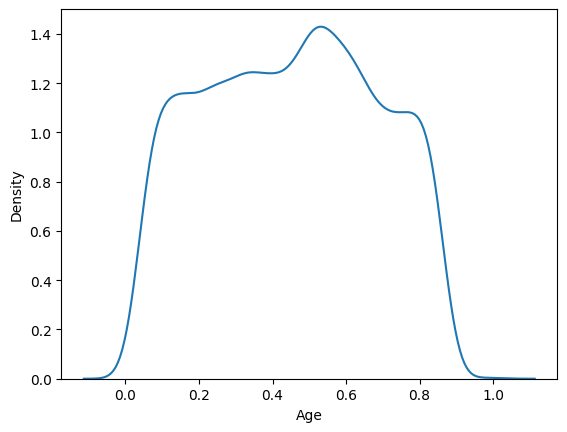

In [40]:
sns.kdeplot(df_train['Age'])

<Axes: ylabel='Cholesterol'>

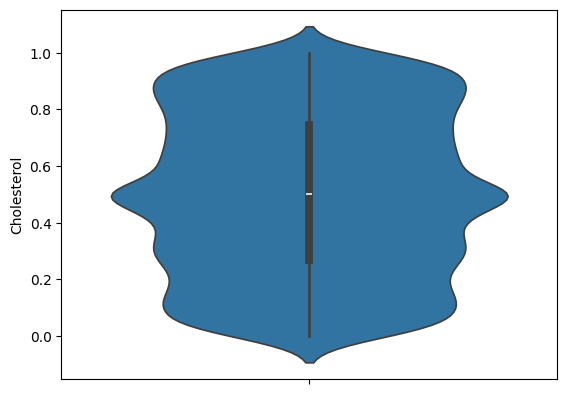

In [33]:
sns.violinplot(df_train['Cholesterol'])

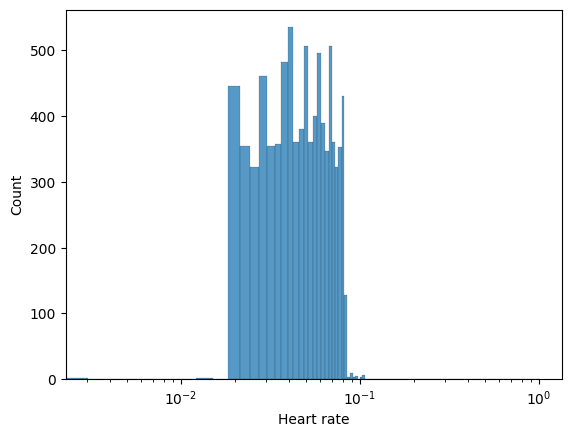

In [34]:
sns.histplot(df_train['Heart rate'])
plt.xscale('log')

<Axes: xlabel='Gender', ylabel='Count'>

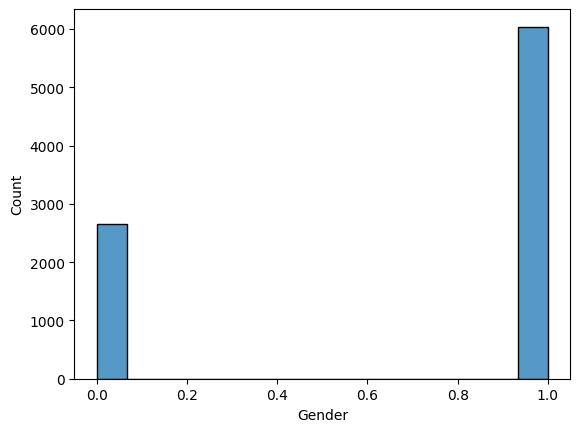

In [35]:
sns.histplot(df_train['Gender'])

In [36]:
print(df_train['Gender'].unique())


[1 0]


In [75]:

INTERVAL_COLS = df_train.select_dtypes(include='number')
INTERVAL_COLS
phik = df_train.drop('id',axis=1).phik_matrix(interval_cols=INTERVAL_COLS)

<Axes: >

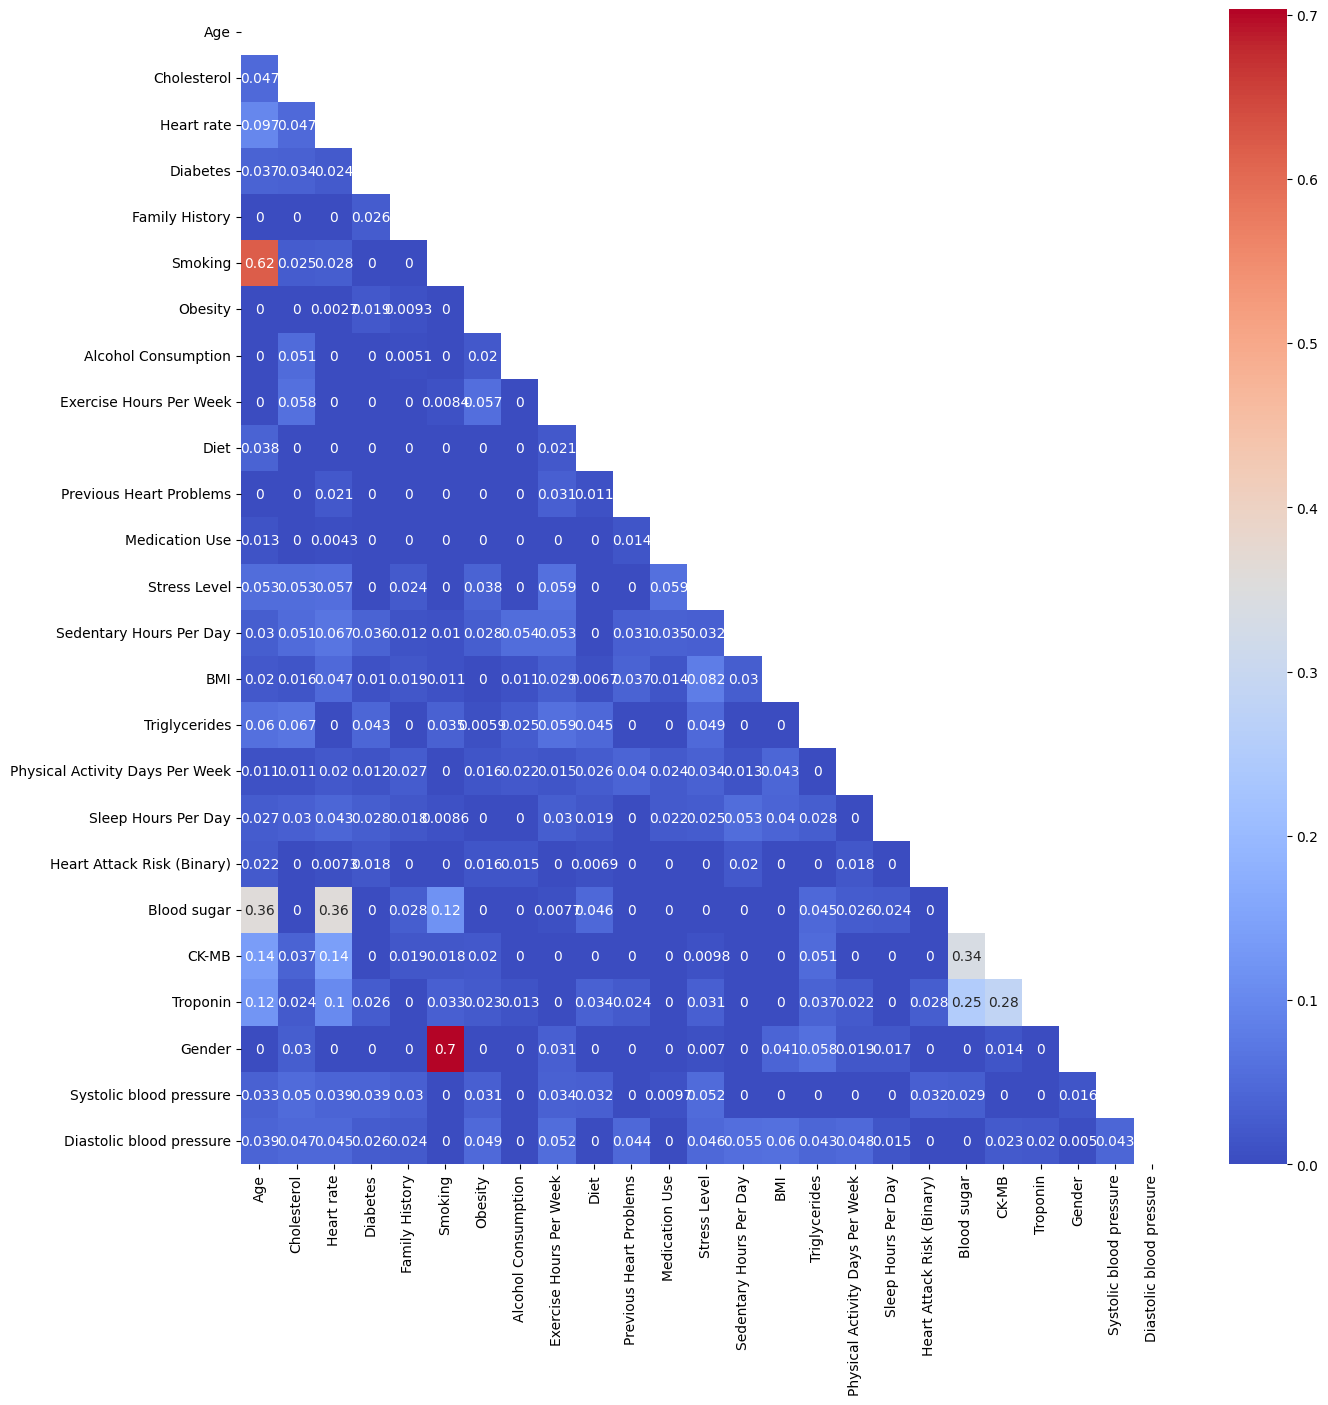

In [76]:
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(phik, dtype=bool))
sns.heatmap(phik, annot=True, mask=mask, cmap='coolwarm')

In [77]:
phik_pairs = (
    phik
    .where(~mask)  
    .stack()  
    .reset_index()
)

phik_pairs.columns = ['Признак 1', 'Признак 2', '$\\phi$ Корреляция']

phik_pairs_sorted = phik_pairs.sort_values(by='$\\phi$ Корреляция', ascending=False)

phik_pairs_sorted.head(30)

,Признак 1,Признак 2,$\phi$ Корреляция
236,Gender,Smoking,0.7034
10,Smoking,Age,0.6205
171,Blood sugar,Age,0.3595
173,Blood sugar,Heart rate,0.3582
209,CK-MB,Blood sugar,0.3372
230,Troponin,CK-MB,0.2844
229,Troponin,Blood sugar,0.2506
192,CK-MB,Heart rate,0.1417
190,CK-MB,Age,0.1386
210,Troponin,Age,0.1230


In [65]:
len(phik.columns)

16

In [66]:
len(df_train.columns)

17